In [42]:
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [43]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [44]:
transform = transforms.Compose([
    transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

target_transform = transforms.Compose([
    transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.ToTensor()
])

In [45]:
## CHANGE DOWNLOAD TO TRUE, IF RUNNING FOR FIRST TIME!
voc_train = datasets.VOCSegmentation(root='./data',
                                     year='2012',
                                     image_set='train',
                                     download=False,
                                     transform=transform,
                                     target_transform=target_transform)

voc_val = datasets.VOCSegmentation(root='./data',
                                   year='2012',
                                   image_set='val',
                                   download=False,
                                   transform=transform,
                                   target_transform=target_transform)

In [66]:
train_loader = torch.utils.data.DataLoader(voc_train, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(voc_val, batch_size=16, shuffle=False)

In [67]:
def show_images_masks(images, masks, num_images=4):
    """
    This function displays images and their corresponding masks.
    :param images: batch of images
    :param masks: batch of masks
    :param num_images: number of images to display
    """
    # Set the number of images to display
    num_images = min(num_images, len(images))

    plt.figure(figsize=(10, 4 * num_images))

    for i in range(num_images):
        ax = plt.subplot(num_images, 2, 2 * i + 1)
        # Convert image tensor to numpy and normalize
        img_np = images[i].numpy().transpose((1, 2, 0))
        img_np = std * img_np + mean
        img_np = np.clip(img_np, 0, 1)
        plt.imshow(img_np)
        plt.title("Image")
        plt.axis("off")

        ax = plt.subplot(num_images, 2, 2 * i + 2)
        # Convert mask tensor to numpy
        mask_np = masks[i].numpy().transpose((1, 2, 0))
        plt.imshow(mask_np, cmap='gray')
        plt.title("Mask")
        plt.axis("off")

        if i == 3:
            print(np.unique(mask_np))

    plt.tight_layout()
    plt.show()

[0.         0.07450981 1.        ]


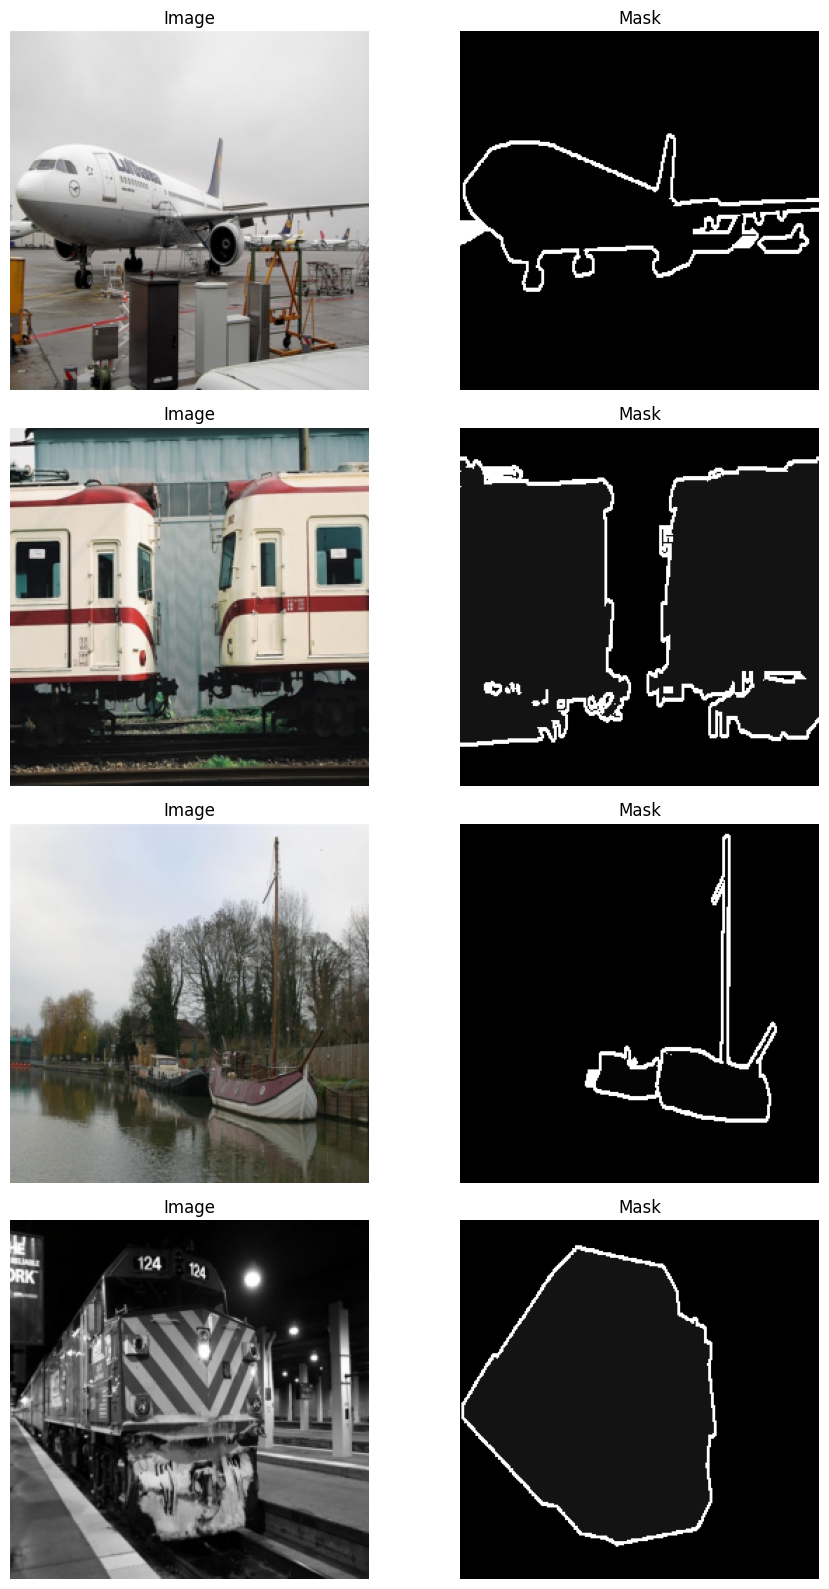

In [68]:
for imgs, masks in val_loader:
    show_images_masks(imgs, masks)
    break
## TODO: Check data integrity (visualize some samples, etc)
## TODO: ValLoader/TrainLoader
## TODO: Trainer Loops


In [ ]:
## TODO: implement trainer (Adam)
## TODO: implement gated UNET
